In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [72]:
#Loading in data:
data = pd.read_excel('Data_Class.xlsx')
preserved_data = data.copy() #Preserving the integrity of the original dataframe in case it is needed
data.head()

#NOTE - x1 and x2 are already scaled!
#x1 = pressure drop, x2 = head, y = type of pump (0 or 1)

,x1,x2,y
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


In [73]:
#Split the data into train and testing sets with a ratio of 0.2
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state = 42)

#Reset the index of training and testing data
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

#Separate the training and testing data into x and y data
ytrain = train.pop('y')
xtrain = train
ytest = test.pop('y')
xtest = test

In [74]:
#We construct and loop through the three classifiers, outputting all of the relevant statistics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
rfc = RandomForestClassifier()
svc_cl = SVC()
lr = LogisticRegression()

results_df = pd.DataFrame()
results_df.index = ['Recall','Precision']

from sklearn.metrics import precision_score, recall_score

for i, reg in enumerate([rfc, svc_cl, lr]):
    
    #Train each classifier
    reg.fit(xtrain, ytrain)
    
    #Create prediction for each classifier
    ytestpred = reg.predict(xtest)
    
    #Evaluate the recall score
    recall = recall_score(ytest,ytestpred) #1 is defined as the positive label by default
    
    #Evaluate the precision score
    precision = precision_score(ytest,ytestpred) #1 is defined as the positive label by default

    
    if i == 0:
        results_df['Random Forest Classifier'] = [recall, precision]
    if i == 1:
        results_df['SVC'] = [recall, precision]
    if i == 2:
        results_df['Logistic Regression'] = [recall, precision]
    

In [75]:
results_df

,Random Forest Classifier,SVC,Logistic Regression
Recall,0.960000,0.98,0.86
Precision,0.969697,0.98,0.86


In [76]:
#Comparing the test data precision and recall scores above, we can see that SVC is generalizing the best, with the random
#forest classifier being slightly worse and the logistic regression performing considerably worse. However, all classifiers
#are performing very well in general on the data, with high precisions and recalls.

In [77]:
#Next, we see if a voting classifier with the 3 models will help improve the precision and recall
from sklearn.ensemble import VotingClassifier
rfc = RandomForestClassifier()
svc_cl = SVC()
lr = LogisticRegression()
vcl = VotingClassifier(estimators=[('rfc', rfc), ('svc', svc_cl), ('lr', lr)]) #creating the voting classifier

#Going through the same training and testing process with the voting classifier
#Train the classifier
vcl.fit(xtrain, ytrain)
    
#Create prediction for each classifier
ytestpred = vcl.predict(xtest)
    
#Evaluate the recall score
recall = recall_score(ytest,ytestpred) #1 is defined as the positive label by default
    
#Evaluate the precision score
precision = precision_score(ytest,ytestpred) #1 is defined as the positive label by default

results_df['Voting Classifier'] = [recall, precision]


#Based upon the outputted results, we can see that the voting classifier isn't able to improve the precision and recall, but
#it performs equivalently as good as the best method, SVC.
results_df

,Random Forest Classifier,SVC,Logistic Regression,Voting Classifier
Recall,0.960000,0.98,0.86,0.98
Precision,0.969697,0.98,0.86,0.98


Text(0.5, 0, 'Method')

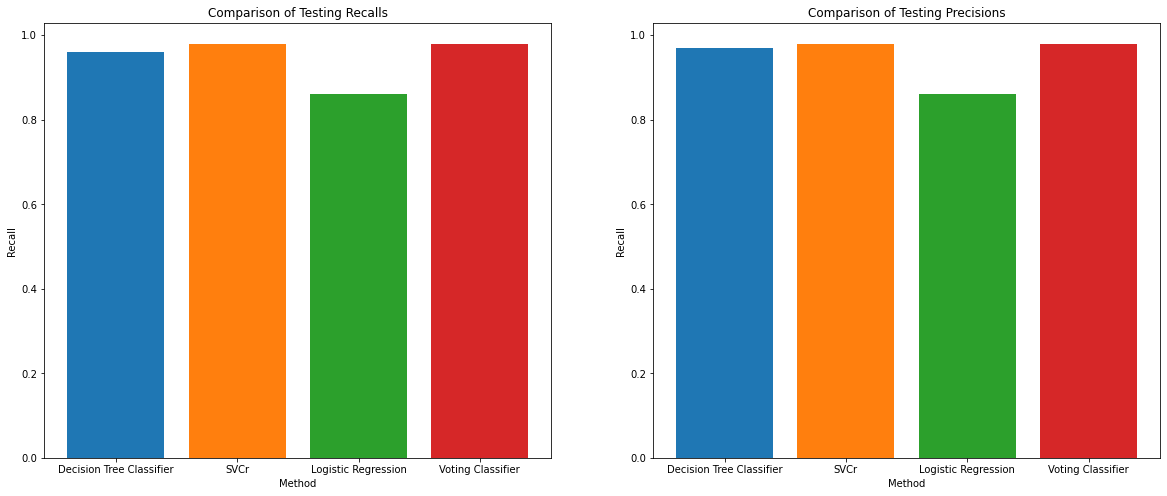

In [78]:
#To compare and contrast the results, two subplots are created, which display the precisions and recalls
plt.figure(figsize=(20,8))

plt.subplot(121)

plt.bar('Decision Tree Classifier',results_df.iloc[0,0])
plt.bar('SVCr',results_df.iloc[0,1])
plt.bar('Logistic Regression',results_df.iloc[0,2])
plt.bar('Voting Classifier', results_df.iloc[0,3])
plt.title('Comparison of Testing Recalls')
plt.ylabel('Recall')
plt.xlabel('Method')

plt.subplot(122)

plt.bar('Decision Tree Classifier',results_df.iloc[1,0])
plt.bar('SVCr',results_df.iloc[1,1])
plt.bar('Logistic Regression',results_df.iloc[1,2])
plt.bar('Voting Classifier', results_df.iloc[1,3])
plt.title('Comparison of Testing Precisions')
plt.ylabel('Recall')
plt.xlabel('Method')

In [79]:
#This comparison of the precision and recall shows that SVC and the Voting Classifier perform equally as well and are the
#best methods. Decision Tree Classifier is nearly equivalently as good as the best two methods, but is very slightly worse
#in terms of precision and recall. Lastly, logistic regression still performs well but considerably worse than the
#other methods. 